Catalin Alexandru Mihalache 08.11.2021 986965

In [10]:
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

TASK 4.1

In [11]:
wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')

train_data, test_data, train_labels, test_labels = train_test_split(wine_data, wine_labels, test_size=0.2)

In [12]:
print(f'Number of features: {train_data.shape[1]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(np.unique(train_labels))}')
print(f'Minimums of the features are: {train_data.min(0)}')
print(f'Maximums of the features are: {train_data.max(0)}')

Number of features: 13
Number of training samples: 142
Number of testing samples: 36
Number of classes: 3
Minimums of the features are: [1.103e+01 7.400e-01 1.360e+00 1.060e+01 7.800e+01 9.800e-01 3.400e-01
 1.400e-01 4.200e-01 1.280e+00 5.400e-01 1.270e+00 2.780e+02]
Maximums of the features are: [1.483e+01 5.800e+00 3.230e+00 3.000e+01 1.620e+02 3.880e+00 5.080e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 3.920e+00 1.680e+03]


In [13]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

Text(0.5, 1.0, 'Predicted Labels')

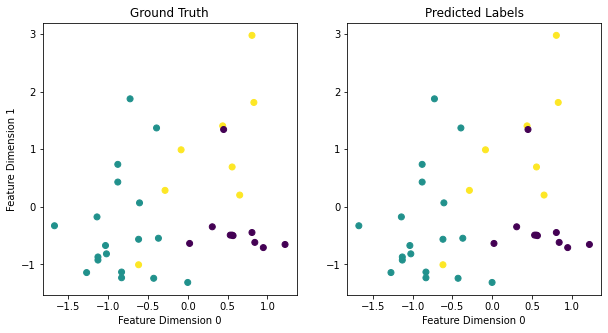

In [27]:
svc = SVC()
svc.fit(train_data, train_labels)

predicted_labels = svc.predict(test_data)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(test_data[:,0], test_data[:,1], c=predicted_labels)
plt.xlabel('Feature Dimension 0')
plt.title('Predicted Labels')

TASK 4.2

In [71]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(9, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 1.4771 - sparse_categorical_accuracy: 0.3097 - val_loss: 1.6836 - val_sparse_categorical_accuracy: 0.1724
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.3776 - sparse_categorical_accuracy: 0.3097 - val_loss: 1.5411 - val_sparse_categorical_accuracy: 0.1724
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2922 - sparse_categorical_accuracy: 0.3186 - val_loss: 1.4358 - val_sparse_categorical_accuracy: 0.1724
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2285 - sparse_categorical_accuracy: 0.3363 - val_loss: 1.3516 - val_sparse_categorical_accuracy: 0.2069
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1776 - sparse_categorical_accuracy: 0.3540 - val_loss: 1.2760 - val_sparse_categorical_accuracy: 0.2069
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1316 - sparse_categorical_accuracy: 0.371

In [72]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 9)                 126       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 33        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


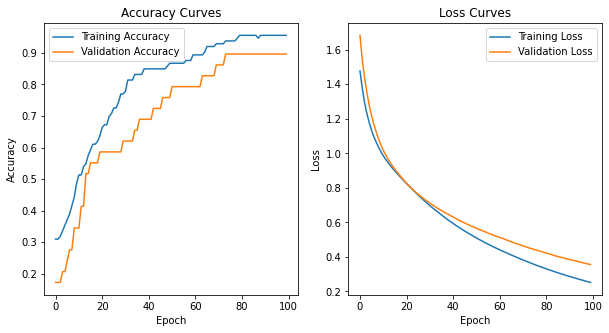

In [73]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
test_results = model.evaluate(test_data, test_labels)

print(f'Test set loss: {test_results[0]:0.2f}, test set accuracy: {test_results[1]*100:0.2f}%')

2/2 [==============================] - 0s 997us/step - loss: 0.2821 - sparse_categorical_accuracy: 1.0000
Test set loss: 0.28, test set accuracy: 100.00%


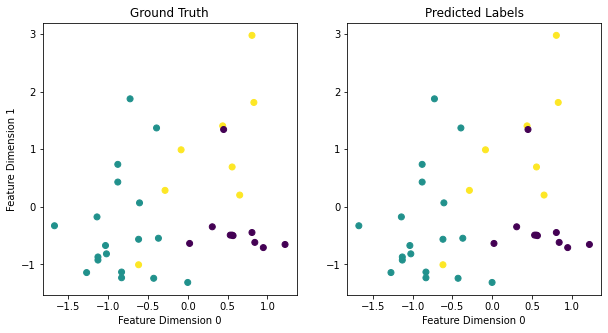

In [75]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(test_data[:,0], test_data[:,1], c=np.argmax(model.predict(test_data), axis=1))
plt.show()

TASK 4.3

In [79]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

print(f'MINST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(np.unique(train_labels))}')

MINST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


In [80]:
train_data_flatten = train_data.reshape((-1, 784))
test_data_flatten = test_data.reshape((-1, 784))

train_data_flatten = train_data_flatten /255
test_data_flatten = test_data_flatten/255

print(train_data_flatten.shape)
print(test_data_flatten.shape)

(60000, 784)
(10000, 784)


In [81]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_data_flatten, train_labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 1s 661us/step - loss: 0.7486 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.3435 - val_sparse_categorical_accuracy: 0.9038
Epoch 2/100
1500/1500 [==============================] - 1s 602us/step - loss: 0.3296 - sparse_categorical_accuracy: 0.9064 - val_loss: 0.2821 - val_sparse_categorical_accuracy: 0.9172
Epoch 3/100
1500/1500 [==============================] - 1s 605us/step - loss: 0.2781 - sparse_categorical_accuracy: 0.9204 - val_loss: 0.2453 - val_sparse_categorical_accuracy: 0.9307
Epoch 4/100
1500/1500 [==============================] - 1s 617us/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.2274 - val_sparse_categorical_accuracy: 0.9348
Epoch 5/100
1500/1500 [==============================] - 1s 598us/step - loss: 0.2216 - sparse_categorical_accuracy: 0.9351 - val_loss: 0.2041 - val_sparse_categorical_accuracy: 0.9420
Epoch 6/100
1500/1500 [==============================] - 1s 601us/step - lo

In [82]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (32, 64)                  50240     
_________________________________________________________________
dense_39 (Dense)             (32, 64)                  4160      
_________________________________________________________________
dense_40 (Dense)             (32, 10)                  650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


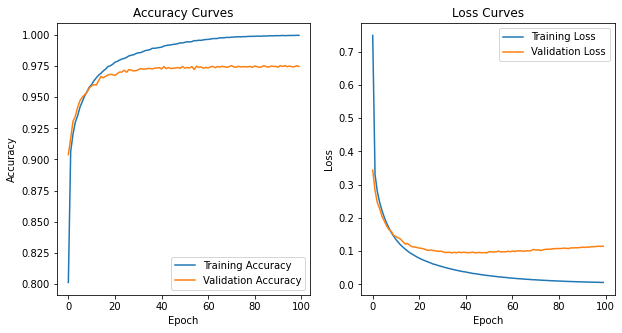

In [87]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [92]:
test_results = model.evaluate(test_data_flatten, test_labels)

print(f'Test set loss: {test_results[0]:0.2f}, test set accuracy: {test_results[1]*100:0.2f}%')

313/313 [==============================] - 0s 731us/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9769
Test set loss: 0.10, test set accuracy: 97.69%


TASK 4.4

In [107]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

print(f'MINST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(np.unique(train_labels))}')

MINST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


In [108]:
train_data = np.expand_dims(train_data, axis=-1)
test_data= np.expand_dims(test_data, axis=-1)

train_data = train_data/255
test_data = test_data/255

print(train_data.shape)
print(test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [116]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3268 - sparse_categorical_accuracy: 0.9067 - val_loss: 0.1880 - val_sparse_categorical_accuracy: 0.9480
Epoch 2/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9534 - val_loss: 0.1358 - val_sparse_categorical_accuracy: 0.9607
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1092 - val_sparse_categorical_accuracy: 0.9684
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1162 - val_sparse_categorical_accuracy: 0.9680
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9775 - val_loss: 0.0934 - val_sparse_categorical_accuracy: 0.9718
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.

In [117]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


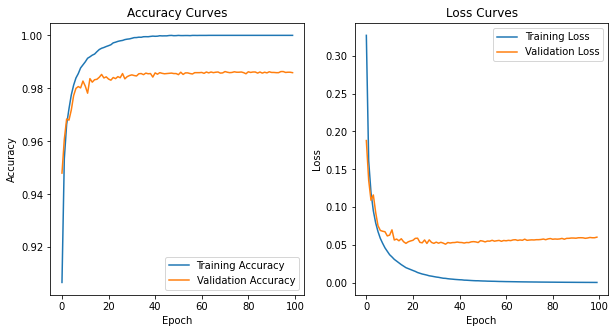

In [118]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [119]:
test_results = model.evaluate(test_data, test_labels)

print(f'Test set loss: {test_results[0]:0.2f}, test set accuracy: {test_results[1]*100:0.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9872
Test set loss: 0.04, test set accuracy: 98.72%
